# Main Manifold Learning Techniques

## Objectives

- Explore and compare different manifold learning techniques for non-linear dimensionality reduction.
- Assess how these techniques unfold complex structures in high-dimensional data to facilitate visualization and analysis.
- Evaluate the effectiveness of each technique in preserving local or global data structures.

## Background

Manifold learning techniques address the challenge of reducing high-dimensional data into lower dimensions while retaining the intrinsic properties of the original dataset. These techniques are crucial for visualizing complex data patterns not discernible in higher dimensions.

## Datasets Used

- The "S-Shape GOLIATH" dataset was generated to represent complex, non-linear structures in three dimensions.
- The classic digits dataset from Scikit-Learn, used to demonstrate the separation capabilities of these techniques on a well-known dataset.

## Introduction

Manifold Learning is a non-linear dimensionality reduction technique used to uncover and preserve the intrinsic low-dimensional structures embedded within high-dimensional data. 

It enables the extraction of meaningful structures and patterns from complex, high-dimensional datasets, facilitating improved data visualization, interpretation, and subsequent analysis.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

##  Locally Linear Embedding

In the last notebook, we studied how the MDS technique could not accurately represent the S-shape GOLIATH dataset in two dimensions. Let's start working with the same example.

In [2]:
# Reading the S-Shape GOLIATH data
dfS = pd.read_csv('GOLIATH_S_curve.csv')
print(dfS.shape)
dfS.head()

(1000, 4)


,x0,x1,x2,labels
0,0.998554,0.767671,1.419358,G
1,0.998582,0.813023,1.420157,G
2,0.999981,0.715265,1.509244,G
3,0.999889,0.879903,1.522331,G
4,0.999874,0.483119,1.523832,G


In [3]:
# Plot the 3D data points
figS = px.scatter_3d(dfS, x='x0', y='x1', z='x2', color='labels',
                     color_discrete_sequence=px.colors.qualitative.G10)
# Adjusting the view angle    
figS.update_layout(scene_camera=dict(eye=dict(x=1.1, y=1.1, z=1)),                    
                width=600, height=400, 
                title='S-Shape GOLIATH - 3D Scatterplot')                
figS.show()

Remember, the graph is interactive, meaning you can zoom in, pan around, and get more information about data points just by hovering your mouse. The legend is also interactive, providing an exciting way to explore the data.

We will need the function plot_GOLIATH to plot our results in two dimensions.

In [4]:
from sklearn.manifold import LocallyLinearEmbedding

Locally Linear Embedding (LLE) is a nonlinear manifold learning technique that seeks to discover the low-dimensional, nonlinear structure in high-dimensional data by reconstructing each data point as a linear combination of its nearest neighbors while preserving local neighborhood structures in the reduced space.

LLE is an algorithm that tries only to preserve distances between nearby points. The resulting embedding would be closer to what we want. Let's use it!

In [5]:
# Computing the LLE embedding
model_L1 = LocallyLinearEmbedding(n_neighbors=82, n_components=2, random_state=20,
                               method='modified', eigen_solver='dense')
df_L1 = pd.DataFrame(model_L1.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_L1['labels'] = dfS['labels']

Here there is a brief explanation of the used parameters:

- `n_neighbors=82`: It specifies the number of nearest neighbors to consider when constructing the local linear relationships in the embedding space. 

- `n_components=2`: It determines the number of dimensions (features) in the reduced representation of the data. Setting it to 2 means the algorithm will aim to create a two-dimensional data representation.

- `random_state=20`: It sets the random seed for the algorithm. It ensures that the results of the LLE algorithm are reproducible when we use the same seed.

- `method='modified'`: It specifies the LLE method to use. `modified` method provides robust and accurate results. 

- `eigen_solver='dense'`: It determines the method used for eigenvalue decomposition, a step in the LLE algorithm. `Dense` is more accurate and suitable for smaller datasets.

In [6]:
def plot_LLE(df):
    '''
    Plot the data in a two-dimensional scatterplot.
    '''
    fig = px.scatter(df, x='x0', y='x1', color='labels', 
                     color_discrete_sequence=px.colors.qualitative.G10)
    fig.update_layout(width=600, height=400, title='GOLIATH Scatterplot - LLE Technique') 
    fig.update_xaxes(range=[-0.1, 0.1])
    fig.update_yaxes(range=[-0.15, 0.15])
    return fig

In [7]:
plot_LLE(df_L1)  

Although it has some distortion from the initial manifold, the outcome can show the key relationships in the data!

In [8]:
# LLE modifying some parameters: n_neighbors and eigen_solver
model_L2 = LocallyLinearEmbedding(n_neighbors=97, n_components=2, random_state=20,
                               method='modified', eigen_solver='auto')
df_L2 = pd.DataFrame(model_L2.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_L2['labels'] = dfS['labels']

plot_LLE(df_L2)

In [9]:
# LLE modifying some parameters: n_neighbors and eigen_solver
model_L3 = LocallyLinearEmbedding(n_neighbors=101, n_components=2, random_state=20,
                               method='modified', eigen_solver='auto')
df_L3 = pd.DataFrame(model_L3.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_L3['labels'] = dfS['labels']

plot_LLE(df_L3)

None of those results are perfect, but all of them are better than the Multidimensional Scaling (MDS) approach we studied in the last notebook!

## Isometric Mapping

In [10]:
from sklearn.manifold import Isomap

Isometric Mapping (Isomap) is a non-linear manifold learning technique that aims to preserve the global geometry of the data by maintaining geodesic distances between all pairs of points. 

Isomap excels in unfolding underlying structures in the data that are obscured in the high-dimensional space. It is particularly effective for datasets where preserving the global structure is more important than just local neighbor relationships. 

Let's use Isomap for our analysis to better capture and visualize the intrinsic geometry of our dataset!

In [11]:
# Computing the Isomap embedding
model_I1 = Isomap(n_neighbors=62, n_components=2, eigen_solver='dense')

df_I1 = pd.DataFrame(model_I1.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_I1['labels'] = dfS['labels']

Here there is a brief explanation of the used parameters:

- `n_neighbors=62`:  This parameter determines the number of nearest neighbors to consider for each point. It's crucial for constructing the neighborhood graph and affects how the manifold is locally approximated.

- `n_components=2`: It determines the number of dimensions (features) in the reduced representation of the data. Setting it to 2 means the algorithm will aim to create a two-dimensional data representation.

- `eigen_solver='dense'`: It determines the method used for eigenvalue decomposition. `Dense` is more accurate and suitable for smaller datasets.

In [12]:
def plot_Iso(df):
    '''
    Plot the data in a two-dimensional scatterplot.
    '''
    fig = px.scatter(df, x='x0', y='x1', color='labels', 
                     color_discrete_sequence=px.colors.qualitative.G10)
    fig.update_layout(width=600, height=400, title='GOLIATH Scatterplot - Isomap Technique') 
    fig.update_yaxes(range=[-1.0, 1.8])    
    return fig

In [13]:
plot_Iso(df_I1)

It also has some distortion from the initial manifold, but the outcome can show the key relationships in the data!

In [14]:
# Isomap modifying some parameters: n_neighbors and eigen_solver
model_I2 = Isomap(n_neighbors=100, n_components=2, eigen_solver='auto')
df_I2 = pd.DataFrame(model_I2.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_I2['labels'] = dfS['labels']

plot_Iso(df_I2)

## t-Distributed Stochastic Neighbor Embedding

In [15]:
from sklearn.manifold import TSNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a powerful and popular manifold learning algorithm renowned for effectively reducing high-dimensional data into lower-dimensional spaces. 

In [16]:
model_T1 = TSNE(random_state=20)

df_T1 = pd.DataFrame(model_T1.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_T1['labels'] = dfS['labels']

In [17]:
def plot_tSNE(df):
    '''
    Plot the data in a two-dimensional scatterplot.
    '''
    fig = px.scatter(df, x='x0', y='x1', color='labels', 
                     color_discrete_sequence=px.colors.qualitative.G10)
    fig.update_layout(width=600, height=400, title='GOLIATH Scatterplot - t-SNE Technique')     
    return fig

In [18]:
plot_tSNE(df_T1)

Notice you cannot read the word GOLIATH, but the algorithm grouped the points of each letter and separated them from the points in the other letters. That is something desirable for many applications.

### Parameters Tuning

Perplexity in t-SNE is a measure that helps balance local versus global data aspects and influences how the algorithm groups points together in the lower-dimensional space. 

The choice of perplexity value can significantly impact the visualization outcome, making it a critical parameter to tune in t-SNE analysis.

The default perplexity value is 30, so the previous solution had perplexity=30. Let's analyze how the perplexity affects the t-SNE solution.

In [19]:
# t-SNE modifying some parameters: perplexity and learning_rate
model_T2 = TSNE(random_state=20, perplexity=5, learning_rate=50)

df_T2 = pd.DataFrame(model_T2.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_T2['labels'] = dfS['labels']

plot_tSNE(df_T2)

With a low perplexity value, the algorithm focuses on the local structure. The result is not good.

In [20]:
# t-SNE modifying some parameters: perplexity and learning_rate
model_T3 = TSNE(random_state=20, perplexity=50)

df_T3 = pd.DataFrame(model_T3.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_T3['labels'] = dfS['labels']

plot_tSNE(df_T3)

The result here is similar to the one we got with the default parameters. The letters are good enough defined and separated, even though you can not read the word GOLIATH.

In [21]:
# t-SNE modifying some parameters: perplexity and learning_rate
model_T4 = TSNE(random_state=20, perplexity=120, learning_rate=100)

df_T4 = pd.DataFrame(model_T4.fit_transform(dfS[['x0','x1','x2']]), columns=['x0', 'x1'])
df_T4['labels'] = dfS['labels']

plot_tSNE(df_T4)

A higher value of perplexity produces a more global view of the data: the letters have the desire order and you can manage to read the word GOLIATH. 

## Separating Digits

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

In [23]:
def plot_digits(data):
    '''
    Function to plot digits
    '''
    fig, axes = plt.subplots(4, 10, figsize=(8, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', 
                  interpolation='nearest', clim=(0,16)) 

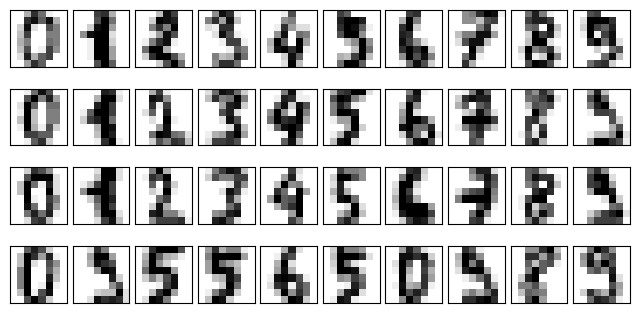

In [24]:
plot_digits(digits.data)

Let's use PCA to visualize the data reduced to two dimensions. We plot the first two principal components and color each dot by its class.

In [25]:
from sklearn.decomposition import PCA

In [26]:
# Build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

In [27]:
# Transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)

We can now plot the first two principal components of each point to learn about the data.

In [28]:
# Create a scatter plot 
fig = px.scatter(x=digits_pca[:, 0], y=digits_pca[:, 1], color=digits.target.astype(str),                 
                 labels={'color': 'Digit Target'},      # Labeling the color bar
                 width=700, height=500, title='PCA of Digits Dataset')

# Update the layout to add axis labels
fig.update_layout(xaxis_title='Component 1', yaxis_title='Component 2')

# Show color scale (color bar)
fig.update_traces(marker=dict(size=6, line=dict(width=0)), 
                  selector=dict(mode='markers'))

# Show the figure
fig.show()

As you can see, some digits are relatively well separated using the first two principal components, though they still overlap. Most of the other digits overlap significantly.

Remember, the graph is interactive, meaning you can zoom in, pan around, and get more information about data points just by hovering your mouse. The legend is also interactive, providing an exciting way to explore the data.

Let's apply t-SNE to the same dataset and compare the results. 

In [29]:
tsne = TSNE(random_state=42)

In [30]:
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

In [31]:
# Create a scatter plot 
fig = px.scatter(x=digits_tsne[:, 0], y=digits_tsne[:, 1], color=digits.target.astype(str),                 
                 labels={'color': 'Digit Target'},      # Labeling the color bar
                 width=700, height=500, title='t-SNE of Digits Dataset')

# Update the layout to add axis labels
fig.update_layout(xaxis_title='t-SNE Component 1', yaxis_title='t-SNE Component 2')

# Show color scale (color bar)
fig.update_traces(marker=dict(size=6, line=dict(width=0)), 
                  selector=dict(mode='markers'))

# Show the figure
fig.show()

The result of t-SNE is quite remarkable. All the classes are pretty clearly separated.

Remember that this method is entirely unsupervised and does not know the class labels. Still, it can find a representation of the data in two dimensions that clearly separates the classes based solely on how close points are in the original space.

## Conclusions

Key Takeaways
- Locally Linear Embedding (LLE) can effectively uncover the underlying structure of non-linear data, maintaining local neighborhoods but may introduce distortions.
- Isometric Mapping (Isomap) is useful for datasets where global geometric relationships are crucial. It unfolds data to reveal its underlying structure.
- t-SNE excels in separating distinct groups in high-dimensional data, making it highly effective for clustering and categorizing categories.
- Techniques vary in effectiveness depending on the nature of the data and the specific relationships that need to be preserved or emphasized.

## References

- https://scikit-learn.org/stable/modules/manifold.html
- Muller, A.C. & Guido, S. (2017) Introduction to Machine Learning with Python. A guide for Data scientists. USA: O'Reilly, chapter 3.
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O'Reilly Media, Inc. chapter 5.